In [5]:
import re
import pandas as pd
from nltk.stem.porter import PorterStemmer

In [6]:
#file containing tweets
df = pd.read_csv('covid')

In [7]:
import nltk

In [8]:
#for removing puntuation marks we need to import string
import string
#for removing stopwords we need nltk courpus of stop words
from nltk.corpus import stopwords

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Stark32C\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stopwords.words('english')[0:20] # Show some stop words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [12]:
df['text'].head()

0    @PMCPune @MPShivajirao @ExpressPune @PuneTimes...
1    @thelostsoul83 @BigBearNPog @PokemonGoApp @Nia...
2    @JasonGoalie34 @nytimes Yes there will be bad ...
3    @JeromeAdamsMD What was he doing before COVID ...
4    Wisconsin reported over 1,300 new COVID-19 cas...
Name: text, dtype: object

In [26]:
import pickle 
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO #for emote


In [14]:
def is_valid_word(word):
    # Check if word begins with an alphabet
    return (re.search(r'^[a-zA-Z][a-z0-9A-Z\._]*$', word) is not None)

In [15]:
def handle_emojis(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' EMO_POS ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' EMO_POS ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' EMO_POS ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;)', ' EMO_POS ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' EMO_NEG ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' EMO_NEG ', tweet)
    return tweet

In [32]:
def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, " ".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return text

In [33]:
#for pre processing
def text_process(tweet):
    
    #converting tweets into lowercase
    tweet=tweet.lower()
    
    #checking for valid word
    for i in tweet:
        i= is_valid_word(i)
        
    #handle emoji
    tweet=handle_emojis(tweet)
    
    #converting graphical emojis into words
    tweet=convert_emojis(tweet)
    
    # Replaces URLs with space
    tweet = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', ' ', tweet)
    
    # Replace @handle with space
    tweet = re.sub(r'@[\S]+', '', tweet)
    
    # Replaces #hashtag with space
    tweet = re.sub(r'#[\S]+', '', tweet)
    
    # Replace multiple spaces with a single space
    tweet = re.sub(r'\s+', ' ', tweet)

    # Check characters to see if they have punctuation
    nopunc = [char for char in tweet if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    result = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return(' '.join(result))



In [34]:
mess = df['text'].apply(text_process)

In [35]:
mess.head()

0                                       pl arrange fr…
1                 covid i’d like 6 hours please alter…
2    yes bad covid seasons going forward treat viru...
3        covid avoid flu respiratory illnesses want t…
4    wisconsin reported 1300 new covid19 cases 2nd ...
Name: text, dtype: object

In [36]:
from textblob import TextBlob

In [37]:
def sentiment_gen(twee):
    pol = TextBlob(twee)
    if pol.sentiment.polarity > 0:
        return 'positive'
    elif pol.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [38]:
sen = []
for i in df.text: 
    sen.append(sentiment_gen(str(i)))

In [39]:
import matplotlib.pyplot as plt

In [40]:
new_df = pd.DataFrame(mess,columns=['Text'])

In [41]:
new_df['Text'] = mess
new_df['Sentiments'] = sen

In [42]:
new_df.head()

,Text,Sentiments
0,pl arrange fr…,neutral
1,covid i’d like 6 hours please alter…,neutral
2,yes bad covid seasons going forward treat viru...,negative
3,covid avoid flu respiratory illnesses want t…,negative
4,wisconsin reported 1300 new covid19 cases 2nd ...,positive


In [43]:
new_df.to_csv("Processed_tweets", index=False, encoding='utf-8')

In [44]:
val= new_df.groupby('Sentiments').count()

In [45]:
neg,neu,pos = val['Text'][0],val['Text'][1],val['Text'][2]

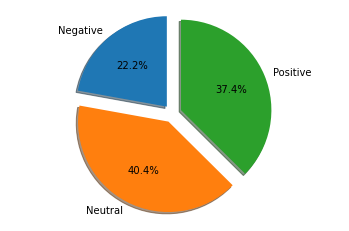

In [46]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Negative', 'Neutral', 'Positive'
sizes = [neg,neu,pos]
explode = (0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'neutral')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()